In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('apple_products.csv')

# Analysis questions:
1. What are top 10 highest rated iphones in India?
2. How many ratings do the highest rated iphones have?
3. Which iphone has the highest number of reviews?
4. What is relationship betweeen the sale price of iphones and the number of ratings?
5. What is relationship betweeen the discount percentage and the number of ratings of iphones?
6. Can you figure out the least expensive and the most expensive iphones in Indian Market, along with all their specifications?
7. Provide url for all the phones with 6GB ram, also costs less than 1Lakh.

In [62]:
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [66]:
df.shape

(62, 11)

# PreProcessing

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


In [38]:
df.duplicated().sum()

0

In [40]:
df.isnull().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

In [42]:
df.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


## 1. What are top 10 highest rated iphones in India?

In [22]:
highest_rating= df.sort_values(by= ['Star Rating'], ascending=False)
highest_rating= highest_rating.head(10)

In [24]:
print(highest_rating['Product Name'])

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object


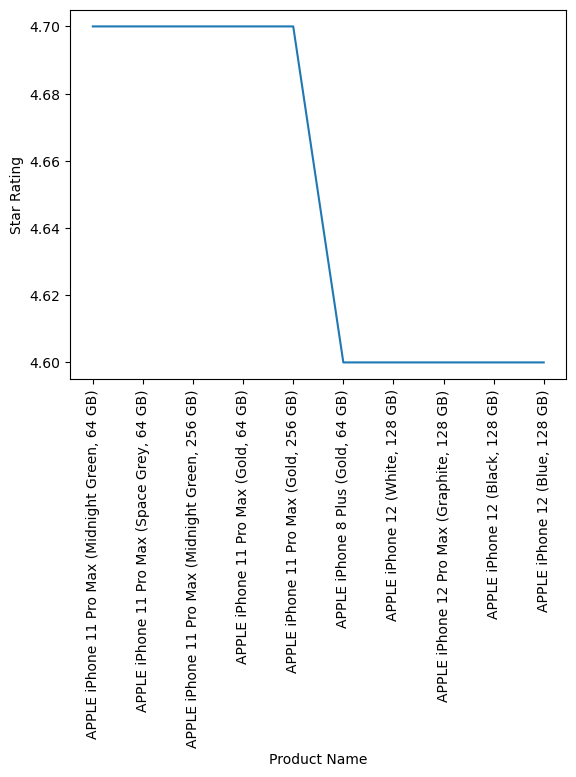

In [46]:
plt.xticks(rotation=90)
p=sns.lineplot(x=highest_rating['Product Name'], y=highest_rating['Star Rating'])

# 2. How many ratings do the highest rated iphones have?


Text(0, 0.5, 'No._of_ratings')

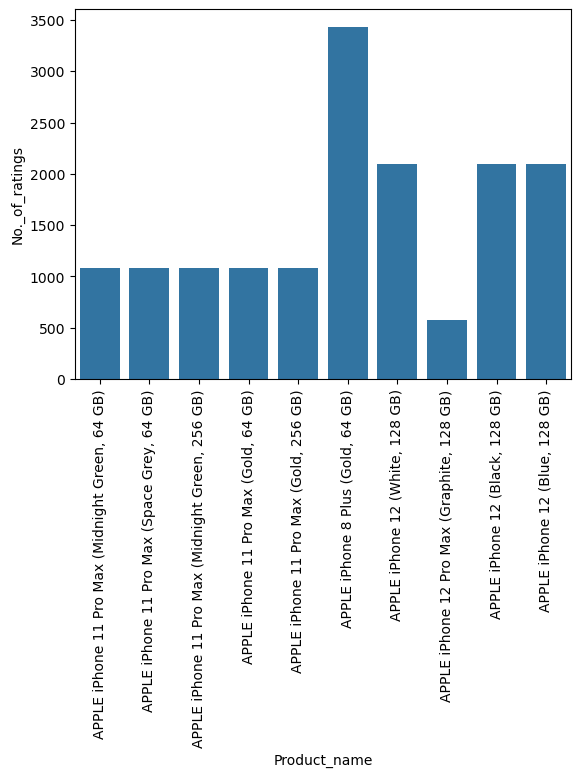

In [107]:
val_count=highest_rating['Product Name'].value_counts()
label=val_count.index
counts=highest_rating['Number Of Ratings']

plt.xticks(rotation=90)
sns.barplot(x=label, y=counts)
plt.xlabel("Product_name")
plt.ylabel("No._of_ratings")


# 3. Which iphone has the highest number of reviews?

In [96]:
highest_review=df.sort_values(by='Number Of Reviews', ascending=False)
highest_review=highest_review.head(1)
highest_review

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
23,"Apple iPhone SE (White, 256 GB) (Includes EarP...",https://www.flipkart.com/apple-iphone-se-white...,Apple,44999,54900,18,95909,8161,MOBFRFXHPZCHAPEH,4.5,2 GB


In [112]:
print(highest_review['Product Name'])

23    Apple iPhone SE (White, 256 GB) (Includes EarP...
Name: Product Name, dtype: object


# 4. What is relationship betweeen the sale price of iphones and the number of ratings?

<Axes: xlabel='Sale Price', ylabel='Number Of Ratings'>

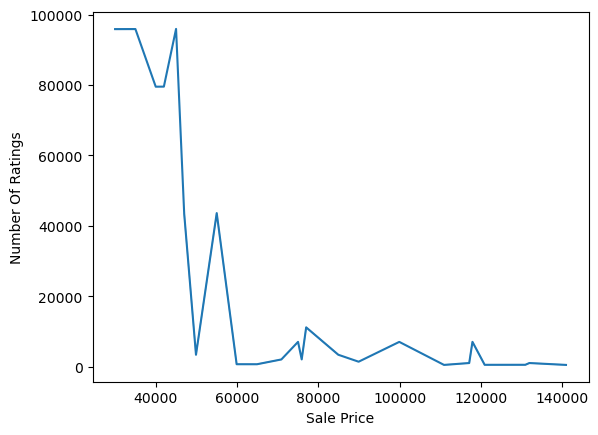

In [134]:
sns.lineplot(x=df['Sale Price'], y=df['Number Of Ratings'])

# 5. What is relationship betweeen the discount percentage and the number of ratings of iphones?

<Axes: xlabel='Discount Percentage', ylabel='Number Of Ratings'>

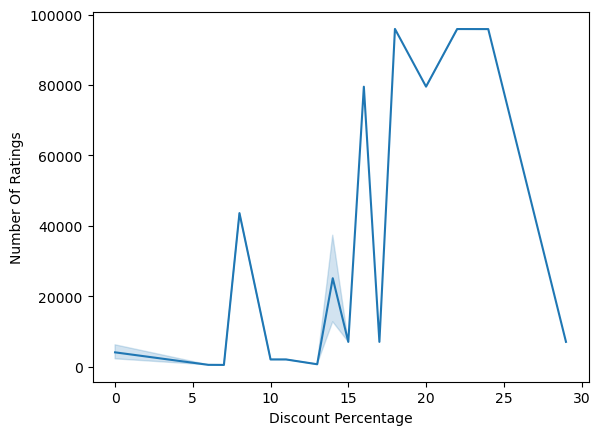

In [136]:
sns.lineplot(x=df['Discount Percentage'], y=df['Number Of Ratings'])

# 6. Can you figure out the least expensive and the most expensive iphones in Indian Market, along with all their specifications?

In [150]:
mrp=df.sort_values(by='Mrp', ascending=True)
least_expensive=mrp.head(1)
most_expensive=mrp.tail(1)

In [146]:
least_expensive

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
52,"APPLE iPhone SE (White, 64 GB)",https://www.flipkart.com/apple-iphone-se-white...,Apple,29999,39900,24,95807,8154,MOBFWQ6BGWDVGF3E,4.5,2 GB


In [152]:
most_expensive

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
41,"APPLE iPhone 12 Pro (Pacific Blue, 512 GB)",https://www.flipkart.com/apple-iphone-12-pro-p...,Apple,140900,149900,6,545,42,MOBFWBYZTHSXKMGW,4.5,4 GB


# 7. Provide url for all the phones with 6GB ram, also costs less than 1Lakh.

In [105]:
required_phone=df[(df["Ram"]=="6 GB") & (df["Mrp"]<=100000)]
required_phone[["Product Name","Product URL"]]

,Product Name,Product URL
29,"APPLE iPhone 12 (White, 128 GB)",https://www.flipkart.com/apple-iphone-12-white...
35,"APPLE iPhone 12 (Black, 128 GB)",https://www.flipkart.com/apple-iphone-12-black...
36,"APPLE iPhone 12 (Blue, 128 GB)",https://www.flipkart.com/apple-iphone-12-blue-...
38,"APPLE iPhone 12 Mini (Red, 64 GB)",https://www.flipkart.com/apple-iphone-12-mini-...
40,"APPLE iPhone 12 (Green, 128 GB)",https://www.flipkart.com/apple-iphone-12-green...
42,"APPLE iPhone 12 (White, 64 GB)",https://www.flipkart.com/apple-iphone-12-white...
43,"APPLE iPhone 12 (Black, 64 GB)",https://www.flipkart.com/apple-iphone-12-black...
44,"APPLE iPhone 12 (Red, 128 GB)",https://www.flipkart.com/apple-iphone-12-red-1...
